# Central Limit Theorem

The central limit theorem (CLT) states that the distribution of sample approximates a normal distribution (also known as a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.<br>

The more samples one takes, the more the graphed results take the shape of a normal distribution.<br>

<b>Use of CLT : </b><br>Central Limit Theorem exhibits a phenomenon where the average of the sample means and standard deviations equal the population mean and standard deviation, which is extremely useful in accurately predicting the characteristics of populations.<br>

<b>Assumptions of CLT : </b><br>
<li>Sampling procedure must be random</li>
<li>Samples are to be independent among each other</li>
<li>Sample size should not be more than 10% of the population when sampling is done without replacement</li>
<li>Sample should be sufficiently large</li>

    
<p>If these assumptions are considered true, the CLT allows you to make inferences about your initial population. Furthermore, the larger the size of your samples, the more evident will be the bell-shape of your sample mean distribution.</p>


<b>Example : </b><br>Say, for example, an investor wishes to analyze the overall return for a stock index that comprises 1,000 equities. In this scenario, that investor may simply study a random sample of stocks, to cultivate estimated returns of the total index. At least 30 randomly selected stocks, across various sectors, must be sampled, for the central limit theorem to hold. Furthermore, previously-selected stocks must be swapped out with different names, to help eliminate bias.



In order to appreciate thsi theorem, Let's visualize it<br>
<p>Let's create a random samples of  womens's weight (by assuming the range between 60 and 90 kg's), each of size n=50<br>
    Now we run this simulation multiple times and see whether the sample means distribution resembles a Normal distribution</p>

In [2]:
#Importing nessesary libraries
import numpy as np
import matplotlib.pyplot as plt

**Creating Data Set**

In [22]:
# seed the random number generator, so that the experiment is #replicable
seed(1)
# Generating the sample of women's weight
weights = np.random.randint(60, 90, 50)
print(weights)
print('The average weight is {} kg'.format(mean(weights)))

[65 71 72 68 69 71 65 75 60 76 61 72 67 73 88 66 85 78 80 65 78 80 71 88
 70 88 89 74 78 64 83 83 69 77 83 60 82 73 69 69 67 89 82 85 61 60 88 77
 68 84]
The average weight is 74.32 kg


**Let's Repeat the simulation for 1000 times**

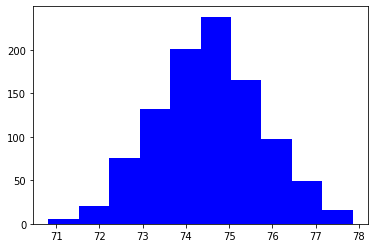

The mean of the sample means is 74.54001999999998


In [23]:
# seed the random number generator
seed(1)
# calculating the mean of 50 women's weights 1000 times
means = [mean(randint(60, 90, 50)) for _i in range(1000)]
# plotting the distribution of sample means
plt.hist(means,color='b')
plt.show()
print('The mean of the sample means is {}'.format(mean(means)))


According, to the Central Limit Theorem, the mean of sample means which is 78.54 should be a good estimate of the real parameter which is unknown 

In [7]:
#Importing nessesary libraries
from pylab import *
import scipy.stats
from scipy.stats import norm
import scipy.special as sps

## Drawing sample distribution

Plotting the distribution for one sample

In [25]:
#Function to plot a distribution for one sample
#The function takes inputs number of experiments,samples,mu and the distribution name
def plot_samples_distribution(no_of_exp, samples, mu, distribution_name):
    pltdim = np.math.ceil(np.math.sqrt(no_of_exp))
    fig, axs = plt.subplots(pltdim, pltdim,
                           figsize=(8,8),
                           gridspec_kw = {'hspace':0.2},
                           sharex = True, sharey = True)
    fig.suptitle('Individual Samples\' {} Distribution'.format(distribution_name))
    fig.text(0.5, 0.04, 'Order values ($)', ha = 'center')
    fig.text(0.04, 0.5, 'Number of Customers', ha = 'center', rotation = 'vertical')
    axs = axs.flatten()
    #iterating through number of experiments
    for ii in range(0, no_of_exp):
        plt.sca(a[ii])
        plt.gca().hist(samples[ii], bins = int(50),
                      histtype = 'step',
                      label = '$mean = {0:.2f}$'.format(np.mean(samples[ii])),
                      range = [0,2*mu])
        if no_of_exp < 25 :
            plt.gca().set_title('Sample #{0} : average = {1:.2f}'.format(ii+1,np.mean(samples[ii])))
        for item in ([axs[ii].title, axs[ii].xaxis.label, axs[ii].yaxis.label]
                    +axs[ii].get_xticklables() + axs[ii].get_yticklabels()):
            item.set_fontsize(8)

### Normal Distribution

The normal distribution is a continuous probability distribution that is symmetrical on both sides of the mean, so the right side of the center is a mirror image of the left side. The area under the normal distribution curve represents probability and the total area under the curve sums to one.

<b><i>Characteristics: </i></b><br>
<li>The mean, median and mode of the distribution coincide.</li>
<li>The curve of the distribution is bell-shaped and symmetrical about the line x=μ.</li>
<li>The total area under the curve is 1.</li>
<li>Exactly half of the values are to the left of the center and the other half to the right.</li>

The PDF of a random variable X following a normal distribution is given by:

$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x-u}{\sigma})^2}$$

Mean and Variance of a random variable X following an exponential distribution:

$$ Mean = E(X) = \mu $$<br>
$$ Variance = Var(X) = \sigma^{2} $$<br>

The graph of a random variable X ~ N ($\mu , \sigma$) is shown below.

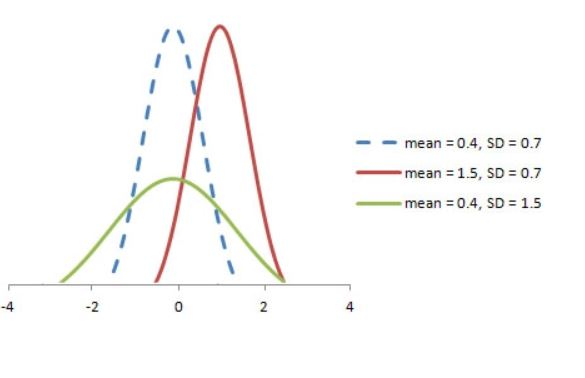

<b>Standard Normal Distribution: </b>
A standard normal distribution is defined as the distribution with mean 0 and standard deviation 1.  For such a case, the PDF becomes:

$$ f(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} $$


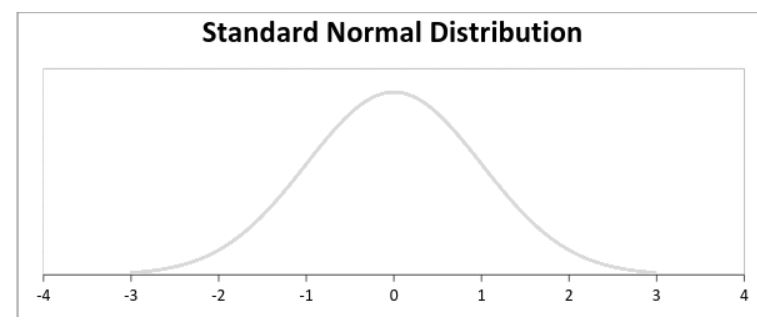

## Normal distribution Approximation

In the following function takes mean from n samples and approximate it to normal distribution

In [26]:
#Function to approximate distribution to normal distribution
def clt_normal_approximation(means,no_of_exp):
    mu, sd = norm.fit(means)
    fig = figure()
    #plotting histogram using matplotlib library
    plt.hist(means, bins = int(50), histtype = 'step', density = True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sd)
    #defining plot parameters
    plt.plot(x, p, 'k', linewidth = 1)
    plt.axvline(x=mu, color='r', linestyle='--')
    #defining title
    plt.title('Overall Average of {} samples \' Average order value'.format(no_of_exp))
    plt.xlabel('Average of individual samples\'s Order value ($)')
    print('Mean of samples is {0:.2f}'.format(mu))
    print('Standard deviation of the samples is {0:.2f}'.format(sd))
    return fig

## Different distributions

### Binomial Distribution

<p>A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times.<br>
There are only two possible outcomes. Head denoting success and tail denoting failure. Therefore, probability of getting a head: p = 0.5 and the probability of failure can be easily computed as: q = 1- p = 0.5.<br>
A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a Binomial Distribution.<br>
</p><br>
<b><i>Properties of Binomial distribution:</i></b><br>
<li>Each trial is independent.</li>
    <li>There are only two possible outcomes in a trial- either a success or a failure.</li>
    <li>A total number of n identical trials are conducted.</li>
    <li>The probability of success and failure is same for all trials. (Trials are identical.)</li>

<b><i>The Mathematical representation of Binomial distribution</i></b>

$$ p(x) = \frac{n!}{(n-x)!x!}p^x q^{n-x}\\ 
$$

<p><b>Where</b></p>
<b>n</b> = The total number of items in the group<br>
<b>x</b> = The number of items in the group of the desired type<br>
<b>p</b> = The probability that any given item in the group is of the desired type<br>
<b>q</b> = The probability that any given item in the group is not of the desired type (Note: q = 1-p )<br>

A binomial distribution graph where the probability of success does not equal the probability of failure looks like:

<p><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/09/16131220/image47.png
" alt="Alt Text" title="Binomial Distribution"></p>

Now, when probability of success = probability of failure, in such a situation the graph of binomial distribution looks like

<p><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/09/16131212/image46.png
" alt="Alt Text" title="Binomial Distribution"></p>


<b><i>Example</i></b><br>
60% of people who purchase posh cars are men.  If 10 posh car owners are randomly selected, find the probability that exactly 7 are men.<br>
<b>Step-1: </b> First we need to identify ‘n’ and ‘x’ from the problem. Using our sample question, n (the number of randomly selected items—in this case, posh car owners are randomly selected) is 10,  and  X (the number you are asked to “find the probability” for) is 7.<br>
<b>Step-2: </b> Figure out the first part of the Formula i.e $$ \frac{n!}{(n-x)!x!} = \frac{10!}{(10-7)!7!} $$ which is equal to 120<br> Set this number aside for a momemnt<br>
<b>Step-3: </b>Find “p” the probability of success and “q” the probability of failure.<br> We are given p = 60%, or .6  therefore, the probability of failure is 1 – .6 = .4 (40%).<br>
p = 0.6 and q = 0.4<br>
<b>Step-4: </b>Now, working on next phase of formula $$ p^{x} = 0.6^{7} = 0.02799 $$ <br> Set this number aside while you work the third part of the formula.<br>
<b>Step-5: </b>Now, working on last phase of the formula $$ q^{n-x} = 0.4^{10-7} = 0.064 $$ <br>
<b>Step-6: </b>Multiply the three answers from steps 2, 4 and 5 together.
120  × 0.0279936 × 0.064 = 0.215.<br>
The required <b>probability</b> is <b> 0.2</b><br>

<b><i>Lets visualize Binomial distribution</i></b><br>
Let's try to compute it for a range and plot it for 10 trails, and p = 0.1<br>
scipy.stats.binom.pmf gives the probability mass function for the binomial distribution.<br>

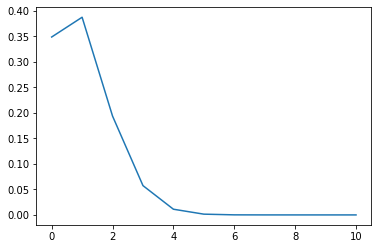

In [32]:
import scipy, scipy.stats
x = np.linspace(0,10,11)
pmf = scipy.stats.binom.pmf(x,10,0.1)
pylab.plot(x,pmf)

In [28]:
#Binomial Distribution
#It takes inputs, number of experiments, sample size,n, probability of success and size of population
def binomial_experiment_clt(no_of_exp, sample_size, n, p, size_of_population=1000, show_all = False):
    samples = []
    means = []
    mu = n*p
    population = np.random.binomial(n,p,size_of_population)
    #Iterating through number of experiments
    for ii in range(0,no_of_exp):
        samples.append(np.random.choice(population,sample_size, replace = True))
        means.append(np.mean(samples[ii]))
    
    if show_all:
        plot_samples_distribution(no_of_exp, samples, mu, 'binomial')
    return means

### Exponential Distribution

<p>Exponential distribution is widely used for survival analysis. From the expected life of a machine to the expected life of a human, exponential distribution successfully delivers the result.<br>
A random variable X is said to have an exponential distribution with PDF:<br>
    
$$ f(x) = \lambda e^{-\lambda,x}, x\geq 0 $$
    
and parameter $ \lambda>0 $ which is also called the <b>Rate</b> <br>
For survival analysis, λ is called the failure rate of a device at any time t, given that it has survived up to t.<br>
Mean and Variance of a random variable X following an exponential distribution:

$$ Mean = E(X) = \frac{1}{\lambda}\\ $$<br>
$$ Variance = Var(X) = \frac{1}{(\lambda^2)}\\ $$<br>
    
<p><b><i>Some examples of domains that have exponential distribution events include:</i></b></p>
<li>The time between clicks on a Geiger counter.</li>
<li>The time until the failure of a part.</li>
<li>The time until the default of a loan.</li>

</p><br>



<b><i>Example: </i></b><br>
Let x = amount of time (in minutes) a bank clerk spends with a customer. The time is known from historical data to have an average amount of time equal to four minutes.<br>
It is given that $\mu$ = 4 minutes, that is, the average time the clerk spends with a customer is 4 minutes.<br>
Calculation of decay parameter: $$ \lambda = \frac{1}{\mu} = 1/4 = 0.25 \\$$ 
To calculate probabilities for an exponential probability density function, we need to use the cumulative density function.<br>
$$ f(x) = \lambda e^{-\lambda,x} = 0.25e^{-0.25,5} = 0.072 $$ <br>

For example, f(5) = 0.25e(-0.25)(5) = 0.072. In other words, the function has a value of .072 when x = 5.<br>


Also, the greater the rate, the faster the curve drops and the lower the rate, flatter the curve. This is explained better with the graph shown below.

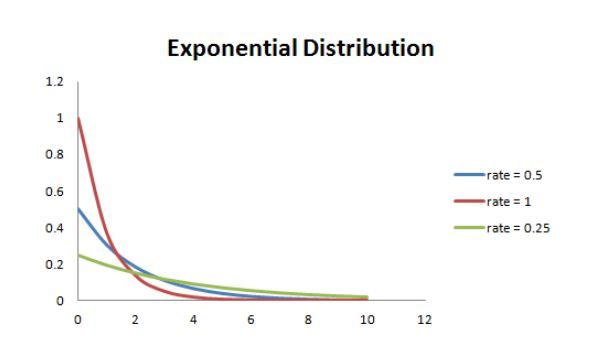

<b><i>A simple example for ploting two figures of a exponential function</i></b><br>

Documentation:<br>
<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" title="np.linspace">np.linspace()</a><br>
<a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html" title="np.exp">np.exp()</a><br>



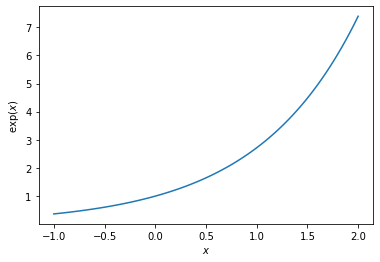

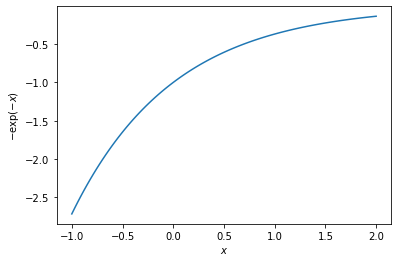

In [22]:
#Declaring x - craeting numeric sequences suing np.linspace()
x = np.linspace(-1, 2, 100)
#Declaring y as exp(x) - calculating exponential of all the elements in the input array as x by using np.exp()
y = np.exp(x)

#Plotting Figure-1
plt.figure()
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')

#Plotting Figure-2
plt.figure()
plt.plot(x, -np.exp(-x))
plt.xlabel('$x$')
plt.ylabel('$-\exp(-x)$')
plt.show()

In [29]:
#Exponential Distribution
#It takes inputs, number of experiments, sample size, mu
def exponential_experiment_clt(no_of_exp, sample_size, mu, show_all = False):
    means = []
    samples = []
    #Iterating through number of experiments
    for ii in range(0,no_of_exp):
        samples.append(np.random.exponential(mu, sample_size))
        means.append(np.mean(samples[ii]))
        
    if show_all:
        plot_samples_distribution(no_of_exp, sample_size, mu, 'exponential')
    return means

### Poisson Distribution

A distribution is called <b>Poisson distribution</b> when the following assumptions are valid:<br>
<li>Any successful event should not influence the outcome of another successful event.</li>
    <li>The probability of success over a short interval must equal the probability of success over a longer interval.</li>
    <li>The probability of success in an interval approaches zero as the interval becomes smaller.</li><br>

Now, if any distribution validates the above assumptions then it is a Poisson distribution. Some notations used in Poisson distribution are:
<li>$\lambda$ is the rate at which an event occurs,</li>
<li>t is the length of a time interval,</li>
<li>And X is the number of events in that time interval.</li>
Here, X is called a Poisson Random Variable and the probability distribution of X is called Poisson distribution.<br>
Let, $\mu$ denote the mean number of events in an interval of length t.<br>
$$ \mu = \lambda*t $$<br>
The PMF of X following a Poisson distribution is given by:
$$ P(X=x) = e^{-\mu}\frac{\mu^{x}}{x!}\\ \forall x = 0,1,2.... $$ 








<i>The mean µ is the parameter of this distribution. µ is also defined as the λ times length of that interval. The graph of a Poisson distribution is shown below:</i>



<p><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/09/16131100/image49.png" alt="Alt Text" title="Poisson Distribution"></p>



<i>The graph shown below illustrates the shift in the curve due to increase in mean.</i>



<p><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/09/16131051/image48.png" alt="Alt Text" title="Poisson Distribution"></p>

<b>Observation: </b>As the mean increases, the curve shifts to the right.

The Mean of Poisson Distribution: $ E(X) = \mu $<br>
The Variance of Poisson Distribution: $ Var(X) = \mu $

<b>Examples: </b><br>
<li>The number of emergency calls recorded at a hospital in a day.</li>
<li>The number of thefts reported in an area on a day.</li>
<li>The number of customers arriving at a salon in an hour.</li>
<li>The number of suicides reported in a particular city.</li>
<li>The number of printing errors at each page of the book.</li>

In [30]:
#Poisson Distribution
#It takes inputs, number of experiments, sample size, lambda(mean), size of population
def poisson_experiment_clt(no_of_exp, sample_size, lam, size_of_population=1000, show_all = False):
    means = []
    samples = []
    mu = lam
    population = np.random.poisson(lam, size_of_population)
    #Iterating through number of experiments
    for ii in range(0,no_of_exp):
        samples.append(np.random.choice(population, sample_size, replace=True))
        means.append(np.mean(samples[ii]))
        
    if show_all:
        plot_samples_distribution(no_of_exp, sample_size, mu, 'poisson')
    return means

### Here we interpret how CLT work for a different distribution

Here we consider Exponential distribution 

Mean of samples is 50.02
Standard deviation of the samples is 1.54


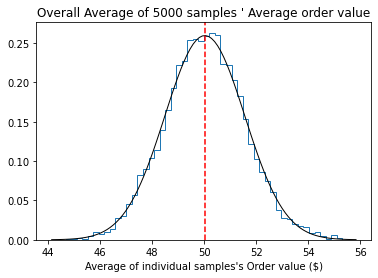

In [31]:
means_1000_samples_5000_exp = exponential_experiment_clt(5000,1000,50,False)
fig_exp_1000 = clt_normal_approximation(means_1000_samples_5000_exp,5000)

From the above plot we can interpret, As we input larger sample it approximates to "Bell Shape"

Documentation:<br>
<a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html" title="matplotlib.pyplot">plt()</a><br>
<a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist" title="matplotlib.pyplot.hist">plt.hist()</a><br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" title="scipy.stats.norm">norm()</a><br>
<a href="https://docs.scipy.org/doc/scipy/reference/special.html" title="scipy.special">sps</a><br>